## Data Manipulation(Join) & Cleaning(Spread)


**Introduction to Data Analysis**


Data analysis can be divided into three parts

* `Data Extraction`: First, we need to collect the data from many sources and combine them.
* `Data Transform`: This step involves the data manipulation. Once we have consolidated all the sources of data, we can begin to clean the data.
* `Data Visualize`: The last move is to visualize our data to check irregularity.

One of the most significant challenges faced by data scientist is the data manipulation. Data is never available in the desired format. The data scientist needs to spend at least half of his time, cleaning and manipulating the data. That is one of the most critical assignments in the job. If the data manipulation process is not complete, precise and rigorous, the model will not perform correctly.

R has a library called dplyr to help in data transformation.

The dplyr library is fundamentally created around four functions to manipulate the data and five verbs to clean the data. After that, we can use the ggplot library to analyze and visualize the data.


![](https://lh3.googleusercontent.com/-b6_7zEXazyY/XXn4BxIPBHI/AAAAAAAAhnA/oe0afQkFa9QkTvPHH2EN8YX7sbJewYbPACK8BGAsYHg/s0/2019-09-12.png)

In this tutorial, you will learn

* Data Analysis
    * Merge with dplyr()
    * left_join()
    * right_join()
    * inner_join()
    * full_join()
* Multiple keys
* Data Cleaning functions
    * gather()
    * spread()
    * separate()
    * unite()
    
### Merge with dplyr()

dplyr provides a nice and convenient way to combine datasets. We may have many sources of input data, and at some point, we need to combine them. A join with dplyr adds variables to the right of the original dataset. The beauty is dplyr is that it handles four types of joins similar to SQL

* Left_join()
* right_join()
* inner_join()
* full_join()

We will study all the joins types via an easy example.

First of all, we build two datasets. Table 1 contains two variables, ID, and y, whereas Table 2 gathers ID and z. In each situation, we need to have a **key-pair** variable. In our case, ID is our **key** variable. The function will look for identical values in both tables and bind the returning values to the right of table 1.



In [3]:
library(dplyr)
df_primary <- tribble(
  ~ID, ~y,
   "A", 5,
   "B", 5,
   "C", 8,
   "D", 0,
  "F", 9)
df_secondary <- tribble(
  ~ID, ~y,
   "A", 30,
   "B", 21,
   "C", 22,
   "D", 25,
   "E", 29)

In [5]:
df_primary

ID,y
A,5
B,5
C,8
D,0
F,9


In [6]:
df_secondary

ID,y
A,30
B,21
C,22
D,25
E,29


#### left_join()
The most common way to merge two datasets is to use the left_join() function. We can see from the picture below that the key-pair matches perfectly the rows A, B, C and D from both datasets. However, E and F are left over. How do we treat these two observations? With the left_join(), we will keep all the variables in the original table and don't consider the variables that do not have a key-paired in the destination table. In our example, the variable E does not exist in table 1. Therefore, the row will be dropped. The variable F comes from the origin table; it will be kept after the left_join() and return NA in the column z. The figure below reproduces what will happen with a left_join().

![](https://lh3.googleusercontent.com/-F9KQXMkrnMg/XXsMZw2G10I/AAAAAAAAhp8/N8YlXpeYuvUWScVg6CTSEfHFgGhlp7GaQCK8BGAsYHg/s0/2019-09-12.png)

In [7]:
left_join(df_primary, df_secondary, by ='ID')

ID,y.x,y.y
A,5,30
B,5,21
C,8,22
D,0,25
F,9,NA


### right_join()

The right_join() function works exactly like left_join(). The only difference is the row dropped. The value E, available in the destination data frame, exists in the new table and takes the value NA for the column y.

In [8]:
right_join(df_primary, df_secondary, by = 'ID')

ID,y.x,y.y
A,5,30
B,5,21
C,8,22
D,0,25
E,NA,29


### inner_join()
When we are 100% sure that the two datasets won't match, we can consider to return only rows existing in both dataset. This is possible when we need a clean dataset or when we don't want to impute missing values with the mean or median.

The inner_join()comes to help. This function excludes the unmatched rows.

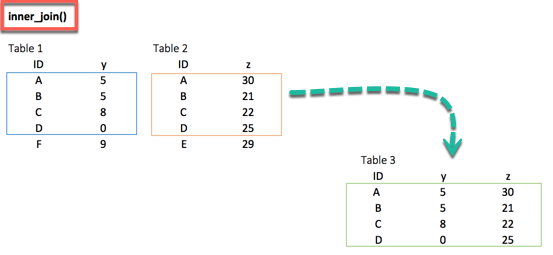

In [9]:
inner_join(df_primary, df_secondary, by ='ID')

ID,y.x,y.y
A,5,30
B,5,21
C,8,22
D,0,25


#### full_join()

Finally, the full_join() function keeps all observations and replace missing values with NA.
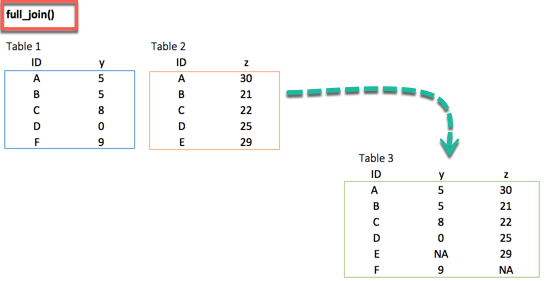

In [10]:
full_join(df_primary, df_secondary, by = 'ID')

ID,y.x,y.y
A,5,30
B,5,21
C,8,22
D,0,25
F,9,NA
E,NA,29


#### Multiple keys pairs
Last but not least, we can have multiple keys in our dataset. Consider the following dataset where we have years or a list of products bought by the customer.

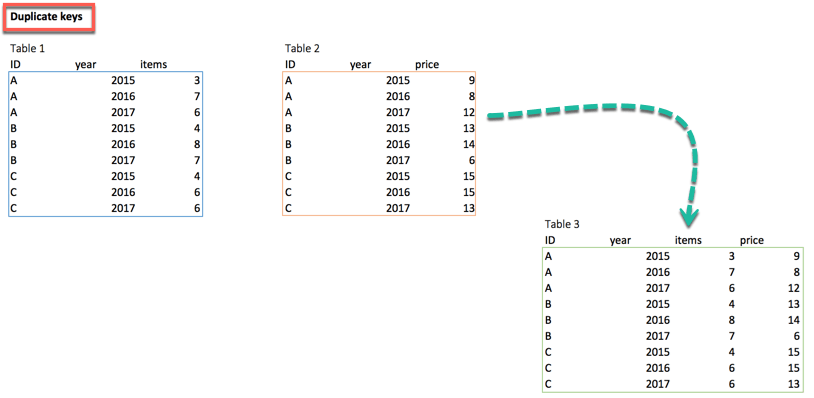



If we try to merge both tables, R throws an error. To remedy the situation, we can pass two key-pairs variables. That is, ID and year which appear in both datasets. We can use the following code to merge table1 and table 2

In [12]:
df_primary <- tribble(
  ~ID, ~year, ~items,
  "A", 2015,3,
  "A", 2016,7,
  "A", 2017,6,
  "B", 2015,4,
  "B", 2016,8,
  "B", 2017,7,
  "C", 2015,4,
  "C", 2016,6,
  "C", 2017,6)
df_secondary <- tribble(
  ~ID, ~year, ~prices,
  "A", 2015,9,
  "A", 2016,8,
  "A", 2017,12,
  "B", 2015,13,
  "B", 2016,14,
  "B", 2017,6,
  "C", 2015,15,
  "C", 2016,15,
  "C", 2017,13)

In [14]:
df_primary

ID,year,items
A,2015,3
A,2016,7
A,2017,6
B,2015,4
B,2016,8
B,2017,7
C,2015,4
C,2016,6
C,2017,6


In [16]:
df_secondary

ID,year,prices
A,2015,9
A,2016,8
A,2017,12
B,2015,13
B,2016,14
B,2017,6
C,2015,15
C,2016,15
C,2017,13


In [17]:
left_join(df_primary, df_secondary, by = c('ID', 'year'))

ID,year,items,prices
A,2015,3,9
A,2016,7,8
A,2017,6,12
B,2015,4,13
B,2016,8,14
B,2017,7,6
C,2015,4,15
C,2016,6,15
C,2017,6,13


## Data Cleaning functions
Following are four important functions to tidy the data:

* gather(): Transform the data from wide to long
* spread(): Transform the data from long to wide
* separate(): Split one variable into two
* unit(): Unit two variables into one

We use the tidyr library. This library belongs to the collection of the library to manipulate, clean and visualize the data. If we install R with anaconda, the library is already installed. We can find the library here, https://anaconda.org/r/r-tidyr.

If not installed already, enter the following command

**gather()**

The objectives of the gather() function is to transform the data from wide to long.

Below, we can visualize the concept of reshaping wide to long. We want to create a single column named growth, filled by the rows of the quarter variables.
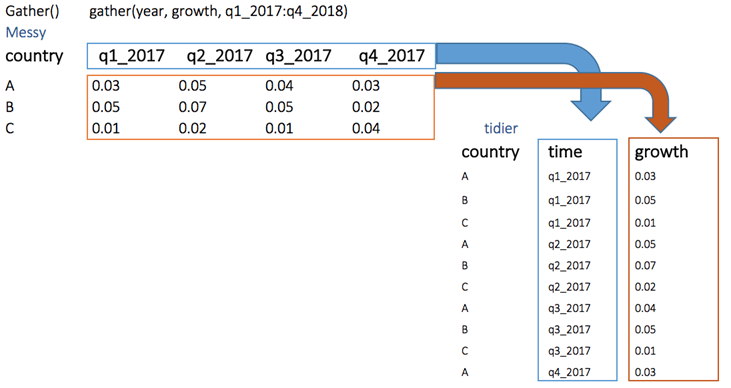

In [19]:
library(tidyr)
# Create a messy dataset
messy <- data.frame(
  country = c("A", "B", "C"),
  q1_2017 = c(0.03, 0.05, 0.01),
  q2_2017 = c(0.05, 0.07, 0.02),
  q3_2017 = c(0.04, 0.05, 0.01),
  q4_2017 = c(0.03, 0.02, 0.04))
messy

country,q1_2017,q2_2017,q3_2017,q4_2017
A,0.03,0.05,0.04,0.03
B,0.05,0.07,0.05,0.02
C,0.01,0.02,0.01,0.04


In [26]:
# Reshape the data
tidier <-messy %>%
gather(quarter, growth, q1_2017:q4_2017)
tidier

country,quarter,growth
A,q1_2017,0.03
B,q1_2017,0.05
C,q1_2017,0.01
A,q2_2017,0.05
B,q2_2017,0.07
C,q2_2017,0.02
A,q3_2017,0.04
B,q3_2017,0.05
C,q3_2017,0.01
A,q4_2017,0.03


In the gather() function, we create two new variable quarter and growth because our original dataset has one group variable: i.e. country and the key-value pairs.

### spread()

The spread() function does the opposite of gather.

spread(data, key, value)

arguments: 
* data: The data frame used to reshape the dataset 
* key: Column to reshape long to wide
* value: Rows used to fill the new column

We can reshape the tidier dataset back to messy with spread()

In [27]:
# Reshape the data
messy_1 <- tidier %>%
  spread(quarter, growth) 
messy_1

country,q1_2017,q2_2017,q3_2017,q4_2017
A,0.03,0.05,0.04,0.03
B,0.05,0.07,0.05,0.02
C,0.01,0.02,0.01,0.04


### separate()

The separate() function splits a column into two according to a separator. This function is helpful in some situations where the variable is a date. Our analysis can require focussing on month and year and we want to separate the column into two new variables.

In [28]:
separate_tidier <-tidier %>%
separate(quarter, c("Qrt", "year"), sep ="_")
head(separate_tidier)

country,Qrt,year,growth
A,q1,2017,0.03
B,q1,2017,0.05
C,q1,2017,0.01
A,q2,2017,0.05
B,q2,2017,0.07
C,q2,2017,0.02


### unite()
The unite() function concanates two columns into one.

In [29]:
unit_tidier <- separate_tidier %>%
  unite(Quarter, Qrt, year, sep ="_")
head(unit_tidier)

country,Quarter,growth
A,q1_2017,0.03
B,q1_2017,0.05
C,q1_2017,0.01
A,q2_2017,0.05
B,q2_2017,0.07
C,q2_2017,0.02


#### Summary

Following are four important functions used in dplyr to merge two datasets.

|Function|	Objectives	|Arguments	|Multiple keys|
|--------|--------------|----------|--------------|
|left_join()|	Merge two datasets. Keep all observations from the origin table	|data, origin, destination, by = "ID"	|origin, destination, by = c("ID", "ID2")|
|right_join()|	Merge two datasets. Keep all observations from the destination table|	data, origin, destination, by = "ID"	|origin, destination, by = c("ID", "ID2")|
|inner_join()|	Merge two datasets. Excludes all unmatched rows	data,| origin, destination, by = "ID"	|origin, destination, by = c("ID", "ID2")|
|full_join()|	Merge two datasets. Keeps all observations|	data, origin, destination, by = "ID"	|origin, destination, by = c("ID", "ID2")|

Using the tidyr Library you can transform a dataset with the gather(), spread(), separate() and unit() functions.

|Function|Objectives|Arguments|
|--------|----------|---------|
|gather()|Transform the data from wide to long|(data, key, value, na.rm = FALSE)|
|spread()|Transform the data from long to wide|(data, key, value)|
|separate()|Split one variables into two|(data, col, into, sep= "", remove = TRUE)|
|unit()|Unit two variables into one|(data, col, conc ,sep= "", remove = TRUE)

